In [62]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

import quandl

%matplotlib inline


In [3]:
quandl.ApiConfig.api_key = '8B-rG_gN6S92BJCXyn7v'

In [28]:
# data = quandl.get_table('WIKI/PRICES', qopts = { 'columns': ['ticker', 'date', 'high', 'low', 'open', 'close', 'volume'] }, ticker = ['AAPL', 'MSFT'], date = { 'gte': '2016-01-01', 'lte': '2016-12-31' })

data = quandl.get_table('WIKI/PRICES', qopts = { 'columns': ['ticker', 'date', 'high', 'low', 'adj_open', 'adj_close', 'volume'] }, ticker = ['AAPL', 'MSFT'])

/anaconda3/lib/python3.6/site-packages/quandl/get_table.py:38: UserWarning: To request more pages, please set paginate=True in your         quandl.get_table() call. For more information see our documentation:         https://github.com/quandl/quandl-python/blob/master/FOR_ANALYSTS.md#things-to-note
  warnings.warn(Message.WARN_PAGE_LIMIT_EXCEEDED, UserWarning)


Text(0,0.5,'adj_close')

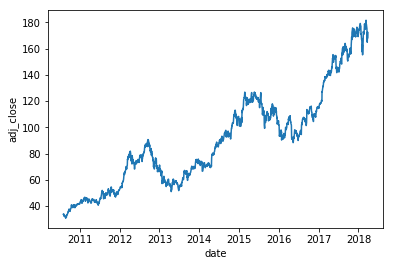

In [53]:
df_data_apple = data[data['ticker'] == 'AAPL']

df_data_apple = df_data_apple[::-1].reset_index()

# myfont = matplotlib.font_manager.FontProperties(
plt.plot(df_data_apple['date'], df_data_apple['adj_close'])
plt.xlabel('date') 
plt.ylabel('adj_close')

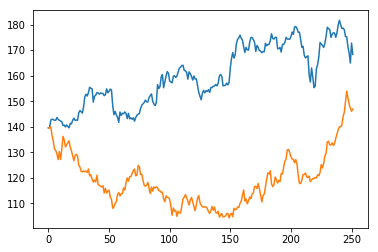

Text(0,0.5,'price')

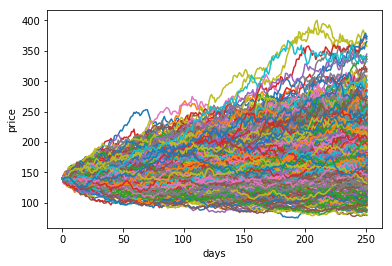

In [61]:
mu = df_data_apple.adj_close.pct_change().iloc[:-252].mean()
sigma = df_data_apple.adj_close.pct_change().iloc[:-252].std()

simulation_dict = {}
simulation_dict['Actual'] = list(df_data_apple.adj_close[-252:].values)

for sim in range(1, 1001):
    simulation_dict['Simulation' + str(sim)] = [df_data_apple.adj_close.iloc[-252]]
    
    for day in range(251):
        next_day = simulation_dict['Simulation' + str(sim)][-1] * np.exp((mu - sigma ** 2 / 2) + sigma * np.random.normal())
        simulation_dict['Simulation' + str(sim)].append(next_day)
        
simulation_df = pd.DataFrame(simulation_dict)

plt.plot(simulation_df)
plt.xlabel('days')
plt.ylabel('price')
